In [4]:
import pickle
with open('/root/BehaviorStudio/behavior_studio/20201029-165838_lap_checkpoints.pkl', 'rb') as f:
    data = pickle.load(f)

    

for point in data:
    print(point)
    
print()
print(data['world'])
print(data['brain_path'])
print(data['robot_type'])
for point in data['checkpoints']:
    print(point)



world
brain_path
robot_type
checkpoints

f1_1_simplecircuit.launch
brains_f1_keras_regression_merged.py
f1
{'x': 53.46199820535064, 'y': -10.73408042493982, 'z': 0.0, 'h': 1, 'yaw': -1.5700038139547323, 'pitch': 0.010361575935596336, 'roll': 7.570666380650001e-05, 'quaternion': [0.7073772888335869, 0.0036886785909736085, 0.0036380498731913738, -0.7068171825060685], 'timestamp': 76.294}
{'x': 53.522017843002686, 'y': -11.969758951756976, 'z': 0.0, 'h': 1, 'yaw': -1.4942869040306397, 'pitch': 0.01036251937073138, 'roll': 6.274705851267854e-05, 'quaternion': [0.7336230566556962, 0.003543904252074784, 0.0037798066881225257, -0.6795368750459434], 'timestamp': 76.703}
{'x': 53.47901036571106, 'y': -13.436611057889158, 'z': 0.0, 'h': 1, 'yaw': -1.6805346712038904, 'pitch': 0.010362209664145746, 'roll': 6.698363413042236e-05, 'quaternion': [0.6672546468143916, 0.0038813287354847064, 0.0034322027872926144, -0.7448116483889571], 'timestamp': 77.111}
{'x': 53.40492683739222, 'y': -14.534160387075

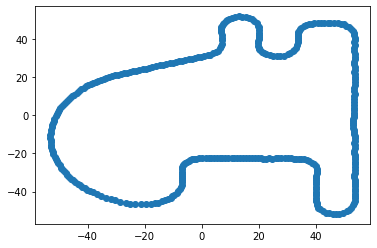

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_points = []
y_points = []

for point in data['checkpoints']:
    # print(point)
    x_points.append(point['x'])
    y_points.append(point['y'])


plt.scatter(x_points, y_points)
plt.show()

In [18]:
def circuit_diameter(data):
    previous_point = []
    diameter = 0
    for i, point in enumerate(data['checkpoints']):
        current_point = np.array([point['x'], point['y']])
        if i is not 0:
            dist = (previous_point - current_point) ** 2
            dist = np.sum(dist, axis=0)
            dist = np.sqrt(dist)
            diameter += dist
            # distancia entre el punto y el anterior excepto en el primer punto que no hay. Esa distancia se suma.
        previous_point = np.array([point['x'], point['y']])
    return diameter
        
# CIRCUIT LONGITUDE
print('LONGITUDE -> ' + str(circuit_diameter(data)) + ' m')
# AVERAGE SPEED
from datetime import datetime

print(data['checkpoints'][0]['timestamp'])
print(data['checkpoints'][len(data['checkpoints'])-1]['timestamp'])
#datetime_object = datetime.strptime(data['checkpoints'][len(data['checkpoints'])-1]['timestamp'], '%H:%M:%S.%f')
#t = datetime_object.time()
#seconds = (t.hour * 60 + t.minute) * 60 + t.second
seconds_start = data['checkpoints'][0]['timestamp']
seconds_end = data['checkpoints'][len(data['checkpoints'])-1]['timestamp']
lap_seconds = seconds_end - seconds_start
print('TIME TO COMPLETE LAP -> ' + str(lap_seconds) + ' s')
print('SPEED -> ' + str(circuit_diameter(data)/lap_seconds) + ' m/s')
        

LONGITUDE -> 429.6794497447751 m
76.294
226.949
TIME TO COMPLETE LAP -> 150.65500000000003 s
SPEED -> 2.852075601505261 m/s


In [25]:
'''
* Get velocity between each checkpoint
* Plot the velocities with colors.
'''

def get_speed_points(data):
    previous_point = []
    speed_points = []
    for i, point in enumerate(data['checkpoints']):
        current_point = np.array([point['x'], point['y']])
        seconds_current = point['timestamp']
        if i is not 0:
            # get distance between points
            dist = (previous_point[1] - current_point[1]) ** 2
            dist = np.sum(dist, axis=0)
            dist = np.sqrt(dist)
            seconds_difference = seconds_current - seconds_previous
            speed_points.append(dist/seconds_difference)
        previous_point = np.array([point['x'], point['y']])
        seconds_previous = seconds_current
    return speed_points

def get_average_speed(speed_points):
    speed = 0
    for point in speed_points:
        speed += point
    return speed / len(speed_points)


speed_points = get_speed_points(data)
#print(speed_points)
print(get_average_speed(speed_points))
print()
print()

for point in speed_points:
    print(point)

1.9125796342789552


3.02121889197344
3.5952257503239635
3.0743678688695177
3.263886653183516
3.367362839803654
2.996233635107851
2.9058518893296017
2.9589744097015696
2.9523031336819483
2.9647591306177463
3.26977629356381
3.1724425239839498
2.953253238515694
3.026116530676451
3.2690680421057823
3.1231794323169204
3.009698804243475
3.184089427459151
2.9899922810516393
2.9344552960313464
2.9423673187284356
2.909458760316008
2.930437415423051
2.937084763541865
3.005516410870035
2.959192297445947
2.979285625499643
2.9836647384684625
2.895684213061742
2.6539622238232234
2.8315276473027446
1.9437190066773813
1.5712271037307706
0.8355676991832646
0.49827184224674376
0.09594219482894911
0.6905173682803991
0.9185578121366235
1.751395687306903
1.8853193443092138
2.3313183214005
2.7785122215325213
2.6140459192534795
2.2921251998679715
2.3073869947003813
2.5813502701687883
2.934980626084365
2.7317569169604927
2.7299193002940245
2.8753995923009183
3.189078208523715
2.8817425520283924
2.82843792723